# A python notebook for a neural network model to classify images of clothing

Libraries used:
> - tensorflow
> - numpy
> - matplotlib

Dataset used:
> - Fashion MNIST containing 70,000 grayscale images in 10 categories of clothing items

## 1. Importing the required libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc1


## 2. Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# Splitting the dataset into training data and testing data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [3]:
# The test labels are digits from 0 - 9 representing different categories of clothing items
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [4]:
# A dictionary mapping labels to their names
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 
               7: 'Sneaker', 8: 'Bag', 9:'Ankle boot'}

## 3. Inspecting the data

The pixel values should fall between 0 - 255 which is the range for RGB color encoding with (0, 0, 0) being black and (255, 255, 255) being white. All other colors fall in between

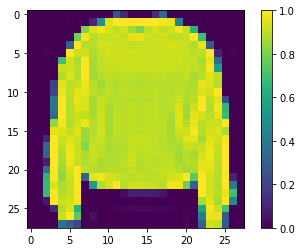

In [57]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

## 4. Normalising the data
Having a color range between 0 - 255 will give the model to many features to take into consideration.
Since the color is not important in identifying the clothe item, we divide the pixel valus by 255 to give them values between 0 - 1 which is interpreted as either black or white. This should be done for both the training and testing values

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the images have been scaled we'll look at the first 10 train images and first ten test images 

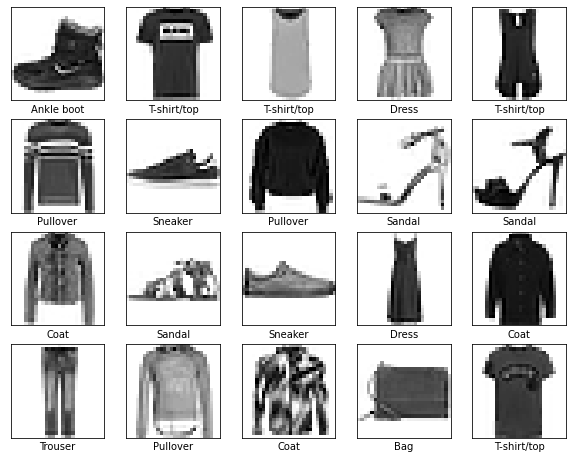

In [9]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
for j in range(10, 20):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[j], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[j]])
    
plt.show()

## 4. Building the Model
The basic building block of a neural network is the layer
- The first layer is the input layer which takes the pixels 28 * 28 flattened into a 1d array
- The second layer is a hidden layer that will take 128 features from the input layer
- The last layer, output layer, returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## 5. Compiling the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

- The optimizer chosen is the adam optimizer
- The loss function chosen is the Cross Entropy loss function
- The metrics to be returned is the accuracy gotten from the loss function

## 6. Training the model
This is done by fitting the training data to the model inorder to begging the iterations over the data adjusting the weights and biases using the optimizer and loss function inorder to find the right parameters to predict values depending on the dataset

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3110 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3407 - accuracy: 0.8819

Test accuracy: 0.8819000124931335


## 7. Making predictions using the trained model

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.1457282e-10, 2.6030946e-12, 1.2807775e-11, 4.3760308e-13,
       5.4824270e-11, 1.5083545e-04, 7.2236613e-11, 6.2787663e-03,
       1.6100041e-07, 9.9357021e-01], dtype=float32)

The predictions are arrays length 10 that have values showing the 
confidence the model has that the predicted value is the one in that index

In [19]:
pred0 = np.argmax(predictions[0])
print(pred0)
print(class_names[pred0])

9
Ankle boot


This shows that the model thinks the most likely item at test_images[0] is an ankle boot

In [22]:
class_names[test_labels[0]]

'Ankle boot'

- Of which it is.
- Here are the first 25 predicted images and their accuracies.

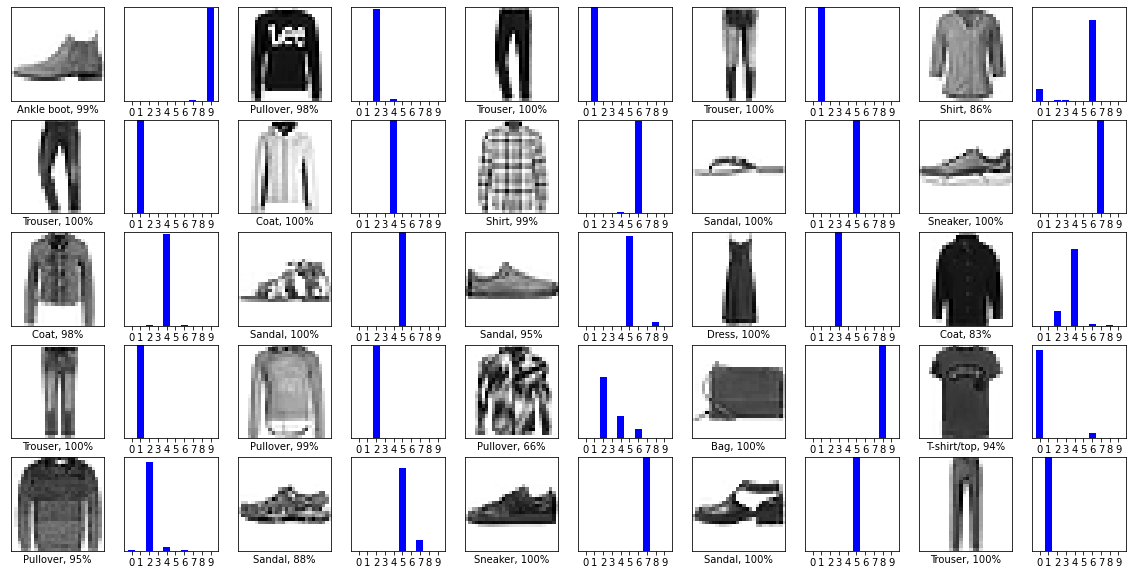

In [56]:
rows = 5
cols = 5
num_images = rows * cols
plt.figure(figsize=(2 * 2 * cols, 2 * rows))

for i in range(num_images):
    prediction = predictions[i]
    predicted_label = np.argmax(predictions[i])
    
    # plot for image
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    label = "{}, {:2.0f}%".format(class_names[predicted_label], (100 * np.max(prediction)))
    plt.xlabel(label)
    
    # plot for the probability distribution of the predictions
    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="blue")
    plt.ylim([0, 1])